            Timestamp  Price
Timestamp                   
2020-10-13 2020-10-13   6.95
2020-10-12 2020-10-12   6.99
2020-10-09 2020-10-09   6.73
2020-09-30 2020-09-30   6.53
2020-09-29 2020-09-29   6.50
                Price
Timestamp            
2011-09-30  15.693333
2011-10-31  24.991875
2011-11-30  26.670909
2011-12-31  23.110909
2012-01-31  20.176667
...               ...
2020-06-30   7.238500
2020-07-31   7.068261
2020-08-31   7.261429
2020-09-30   6.767273
2020-10-31   6.890000

[110 rows x 1 columns]
最优模型:                                 SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  110
Model:               SARIMAX(2, 1, 9)   Log Likelihood                -290.285
Date:                Fri, 16 Oct 2020   AIC                            604.570
Time:                        15:25:13   BIC                            635.711
Sample:                    09-30-2011   HQIC                           617.170
      

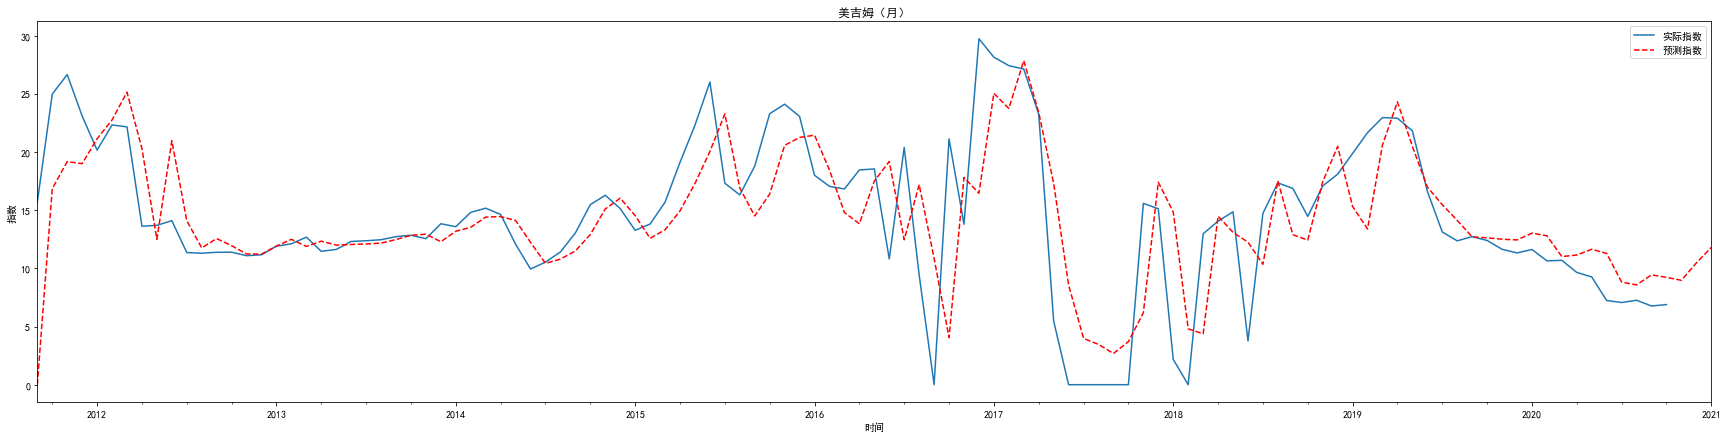

In [9]:
# -*- coding: utf-8 -*-
# 美吉姆走势预测，使用时间序列ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime, timedelta
import calendar

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# 数据加载
df = pd.read_csv('./002621_index_1990_12_19_to_2020_10_13.csv')
df = df[['Timestamp', 'Price']]

# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# 数据探索
print(df.head())
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()
print(df_month)

# 设置参数范围
ps = range(0, 10)
qs = range(0, 10)
ds = range(1, 3)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
# 寻找最优ARIMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_month.Price,
                                order=(param[0], param[1], param[2]),
                                #seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())

# 设置future_month，需要预测的时间date_list
df_month2 = df_month[['Price']]
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=next_month_days)
    date_list.append(last_month)
print('date_list=', date_list)

# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])

# get_prediction得到的是区间，使用predicted_mean
df_month2['forecast'] = best_model.get_prediction(start=0, end=len(df_month2)).predicted_mean

# 美吉姆预测结果显示
plt.figure(figsize=(30,7))
df_month2.Price.plot(label='实际指数')
df_month2.forecast.plot(color='r', ls='--', label='预测指数')
plt.legend()
plt.title('美吉姆（月）')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()


[[ 6.95  6.99  6.73  6.53]
 [ 6.99  6.73  6.53  6.5 ]
 [ 6.73  6.53  6.5   6.66]
 ...
 [23.6  24.25 22.66 23.1 ]
 [24.25 22.66 23.1  23.98]
 [22.66 23.1  23.98  0.  ]]
(2191, 4)
Epoch 1/300
 - 2s - loss: 197.5540
Epoch 2/300
 - 0s - loss: 72.3385
Epoch 3/300
 - 0s - loss: 30.4204
Epoch 4/300
 - 0s - loss: 32.6152
Epoch 5/300
 - 0s - loss: 32.2136
Epoch 6/300
 - 0s - loss: 31.1894
Epoch 7/300
 - 0s - loss: 31.0493
Epoch 8/300
 - 0s - loss: 30.1498
Epoch 9/300
 - 0s - loss: 29.4925
Epoch 10/300
 - 0s - loss: 27.2852
Epoch 11/300
 - 0s - loss: 23.5206
Epoch 12/300
 - 0s - loss: 20.0510
Epoch 13/300
 - 0s - loss: 17.1968
Epoch 14/300
 - 0s - loss: 15.1678
Epoch 15/300
 - 0s - loss: 13.7751
Epoch 16/300
 - 0s - loss: 13.0373
Epoch 17/300
 - 0s - loss: 12.1240
Epoch 18/300
 - 0s - loss: 11.4063
Epoch 19/300
 - 0s - loss: 10.9993
Epoch 20/300
 - 0s - loss: 10.4402
Epoch 21/300
 - 0s - loss: 9.8086
Epoch 22/300
 - 0s - loss: 9.5841
Epoch 23/300
 - 0s - loss: 9.3176
Epoch 24/300
 - 0s - loss: 9

Epoch 233/300
 - 0s - loss: 5.8644
Epoch 234/300
 - 0s - loss: 5.7774
Epoch 235/300
 - 0s - loss: 5.8268
Epoch 236/300
 - 0s - loss: 5.5684
Epoch 237/300
 - 0s - loss: 5.4248
Epoch 238/300
 - 0s - loss: 5.7435
Epoch 239/300
 - 0s - loss: 5.8212
Epoch 240/300
 - 0s - loss: 5.8318
Epoch 241/300
 - 0s - loss: 5.7045
Epoch 242/300
 - 0s - loss: 5.7842
Epoch 243/300
 - 0s - loss: 5.8191
Epoch 244/300
 - 0s - loss: 5.6141
Epoch 245/300
 - 0s - loss: 5.3626
Epoch 246/300
 - 0s - loss: 5.7166
Epoch 247/300
 - 0s - loss: 5.6480
Epoch 248/300
 - 0s - loss: 5.6785
Epoch 249/300
 - 0s - loss: 5.6679
Epoch 250/300
 - 0s - loss: 5.9296
Epoch 251/300
 - 0s - loss: 5.7843
Epoch 252/300
 - 0s - loss: 5.3108
Epoch 253/300
 - 0s - loss: 5.8195
Epoch 254/300
 - 0s - loss: 5.7009
Epoch 255/300
 - 0s - loss: 5.4943
Epoch 256/300
 - 0s - loss: 5.9482
Epoch 257/300
 - 0s - loss: 5.5413
Epoch 258/300
 - 0s - loss: 5.8725
Epoch 259/300
 - 0s - loss: 5.5497
Epoch 260/300
 - 0s - loss: 5.8993
Epoch 261/300
 - 0s 

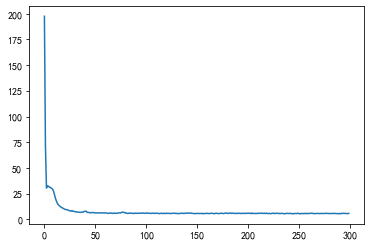

No handles with labels found to put in legend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 3, 128)            66560     
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________
None


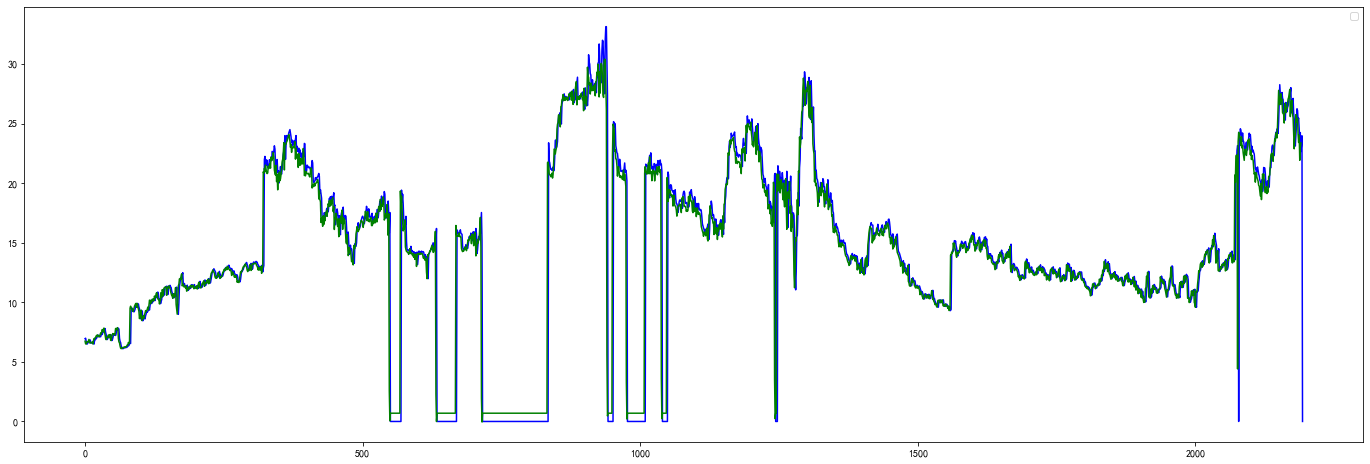

In [13]:
# 使用LSTM预测美吉姆
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pandas import DataFrame
from pandas import concat
from itertools import chain
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 转化为可以用于监督学习的数据
def get_train_set(data_set, timesteps_in, timesteps_out=1):
    train_data_set = np.array(data_set)
    reframed_train_data_set = np.array(series_to_supervised(train_data_set, timesteps_in, timesteps_out).values)
    print(reframed_train_data_set)
    print(reframed_train_data_set.shape)
    train_x, train_y = reframed_train_data_set[:, :-timesteps_out], reframed_train_data_set[:, -timesteps_out:]
    # 将数据集重构为符合LSTM要求的数据格式,即 [样本数，时间步，特征]
    train_x = train_x.reshape((train_x.shape[0], timesteps_in, 1))
    return train_x, train_y

"""
将时间序列数据转换为适用于监督学习的数据
给定输入、输出序列的长度
data: 观察序列
n_in: 观测数据input(X)的步长，范围[1, len(data)], 默认为1
n_out: 观测数据output(y)的步长， 范围为[0, len(data)-1], 默认为1
dropnan: 是否删除NaN行
返回值：适用于监督学习的 DataFrame
"""
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # 预测序列 (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # 拼接到一起
    agg = concat(cols, axis=1)
    agg.columns = names
    # 去掉NaN行
    if dropnan:
        agg.dropna(inplace=True)
    return agg


# 使用LSTM进行预测
def lstm_model(source_data_set, train_x, label_y, input_epochs, input_batch_size, timesteps_out):
    model = Sequential()
    
    # 第一层, 隐藏层神经元节点个数为128, 返回整个序列
    model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(train_x.shape[1], train_x.shape[2])))
    # 第二层，隐藏层神经元节点个数为128, 只返回序列最后一个输出
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    # 第三层 因为是回归问题所以使用linear
    model.add(Dense(timesteps_out, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # LSTM训练 input_epochs次数, verbose = 2 为每个epoch输出一行记录, =1为输出进度条记录, =0 不在标准输出流输出日志信息
    res = model.fit(train_x, label_y, epochs=input_epochs, batch_size=input_batch_size, verbose=2, shuffle=False)

    # 模型预测
    train_predict = model.predict(train_x)
    #test_data_list = list(chain(*test_data))
    train_predict_list = list(chain(*train_predict))

    plt.plot(res.history['loss'], label='train')
    plt.show()
    print(model.summary())
    plot_img(source_data_set, train_predict)

# 呈现原始数据，训练结果，验证结果，预测结果
def plot_img(source_data_set, train_predict):
    plt.figure(figsize=(24, 8))
    # 原始数据蓝色
    plt.plot(source_data_set[:, -1], c='b')
    # 训练数据绿色
    plt.plot([x for x in train_predict], c='g')
    plt.legend()
    plt.show()

# 设置观测数据input(X)的步长（时间步），epochs，batch_size
timesteps_in = 3
timesteps_out = 1    
epochs = 300
batch_size = 200
data = pd.read_csv('./002621_index_1990_12_19_to_2020_10_13.csv')
data_set = data[['Price']].values.astype('float64')
# 转化为可以用于监督学习的数据
train_x, label_y = get_train_set(data_set, timesteps_in=timesteps_in, timesteps_out=timesteps_out)

# 使用LSTM进行训练、预测
lstm_model(data_set, train_x, label_y, epochs, batch_size, timesteps_out=timesteps_out)


In [10]:
train_x.shape

(2189, 3, 1)

In [11]:
label_y.shape

(2189, 3)